In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from datetime import datetime

### Скачиваем необходимые библиотеки

In [2]:
data = pd.read_parquet('/kaggle/input/ioai-2025-preparation-class-lesson-2-homework/train.parquet')
test_data = pd.read_csv('/kaggle/input/ioai-2025-preparation-class-lesson-2-homework/test.csv', parse_dates=['timestamp'])
data['date'] = data['timestamp'].dt.date.astype(str)
test_data['date'] = test_data['timestamp'].dt.date.astype(str)
test_data['day'] = test_data['date'].apply(lambda p: '-' + '-'.join(p.split('-')[1:]))
data['day'] = data['date'].apply(lambda p: '-' + '-'.join(p.split('-')[1:]))

### Загружаем данные и создаём колонки даты и дня года

In [3]:
data['year'] = data['timestamp'].dt.to_period('Y').astype(str)

### Также создаём колонку года

In [4]:
data

,timestamp,station_id,temperature,humidity,wind,date,day,year
0,2000-04-01 00:00:00,1,14.520706,69.998333,4.046831,2000-04-01,-04-01,2000
1,2000-04-01 01:00:00,1,15.911492,69.998333,4.046831,2000-04-01,-04-01,2000
2,2000-04-01 02:00:00,1,13.301754,69.998333,4.046831,2000-04-01,-04-01,2000
3,2000-04-01 03:00:00,1,14.365540,69.998333,4.046831,2000-04-01,-04-01,2000
4,2000-04-01 04:00:00,1,13.145509,69.998333,4.046831,2000-04-01,-04-01,2000
...,...,...,...,...,...,...,...,...
6255979,2024-05-31 19:00:00,31,24.302536,60.024836,4.999833,2024-05-31,-05-31,2024
6255980,2024-05-31 20:00:00,31,22.693778,60.024836,4.999833,2024-05-31,-05-31,2024
6255981,2024-05-31 21:00:00,31,25.320728,60.024836,4.999833,2024-05-31,-05-31,2024
6255982,2024-05-31 22:00:00,31,24.480543,60.024836,4.999833,2024-05-31,-05-31,2024


## Итак, основная идея: найти самые похожие на 2024 года по тому отрезку 2024 года, что нам дан: чем ближе температуры тем похожей года

In [5]:
temp_grs = data.groupby(['year', 'day'], as_index=False).agg({'temperature': 'mean'})

In [6]:
days = temp_grs[temp_grs['year'] == '2024']['day'].tolist()

In [7]:
temp_new = temp_grs[temp_grs['day'].isin(days)]

In [8]:
temp_new

,year,day,temperature
0,1999,-01-27,13.109063
1,1999,-01-28,14.609363
2,1999,-01-29,10.455098
3,1999,-01-30,10.416721
4,1999,-01-31,10.821021
...,...,...,...
9252,2024,-05-27,27.722757
9253,2024,-05-28,28.097774
9254,2024,-05-29,27.957307
9255,2024,-05-30,28.020613


In [9]:
dct = dict()

for p in temp_new['year'].unique():
    t1 = temp_new[temp_new['year'] == p]
    t2 = temp_new[temp_new['year'] == '2024']
    t = t1.merge(t2, on='day')
    prt = t['temperature_x'] - t['temperature_y']
    prt = prt.apply(abs)
    dct[p] = sum(prt)
dct = sorted(dct.items(), key=lambda x: x[1])

In [10]:
good_years = [dct[i][0] for i in range(9)]

### Получаем список лучших лет, включая 2024 год

In [11]:
good_years

['2024', '2005', '2001', '2002', '2021', '2019', '1999', '2023', '2006']

### Оставляем только хорошие года

In [12]:
data = data[data['year'].isin(good_years)]

In [13]:
data

,timestamp,station_id,temperature,humidity,wind,date,day,year
6600,2001-01-01 00:00:00,1,-0.659748,50.344267,1.300366,2001-01-01,-01-01,2001
6601,2001-01-01 01:00:00,1,0.263284,50.344267,1.300366,2001-01-01,-01-01,2001
6602,2001-01-01 02:00:00,1,34.936032,50.344267,1.300366,2001-01-01,-01-01,2001
6603,2001-01-01 03:00:00,1,-0.818929,50.344267,1.300366,2001-01-01,-01-01,2001
6604,2001-01-01 04:00:00,1,2.791386,50.344267,1.300366,2001-01-01,-01-01,2001
...,...,...,...,...,...,...,...,...
6255979,2024-05-31 19:00:00,31,24.302536,60.024836,4.999833,2024-05-31,-05-31,2024
6255980,2024-05-31 20:00:00,31,22.693778,60.024836,4.999833,2024-05-31,-05-31,2024
6255981,2024-05-31 21:00:00,31,25.320728,60.024836,4.999833,2024-05-31,-05-31,2024
6255982,2024-05-31 22:00:00,31,24.480543,60.024836,4.999833,2024-05-31,-05-31,2024


### На графике видно, что года примерно близки друг к другу

<Axes: xlabel='day', ylabel='temperature'>

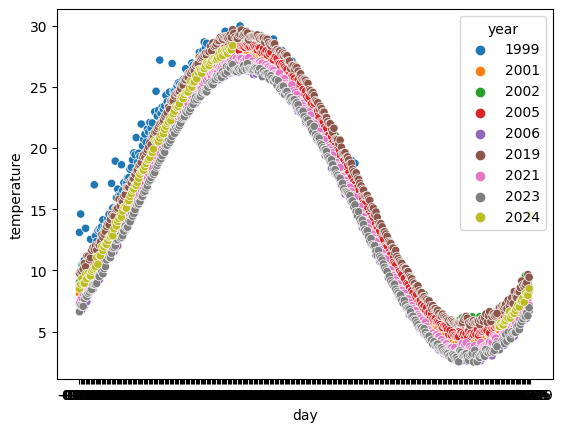

In [14]:
sns.scatterplot(data=temp_grs[temp_grs['year'].isin(good_years)], x='day', y='temperature', hue='year')

### Группируем данные по дням и станциям и аггрегируем списком температур, где мы будем искать минимум и максимум

In [15]:
grs = data.groupby(['day', 'station_id'], as_index=False).agg(m=('temperature', list))

In [16]:
ans = test_data.merge(grs)

### Так как в данных много выбросов, возьмём не минимум и максимум, а 5% квантиль и 95% квантиль

In [17]:
ans['answer'] = ans.apply(lambda x: np.quantile(x['m'], 0.95) if x['measure_type'] == 'max' else np.quantile(x['m'], 0.05) , axis=1)

In [18]:
ans

,ID,station_id,timestamp,measure_type,date,day,m,answer
0,0,1,2024-06-01,max,2024-06-01,-06-01,"[24.62596438405065, 23.110375833393153, 23.186...",30.754406
1,1,1,2024-06-01,min,2024-06-01,-06-01,"[24.62596438405065, 23.110375833393153, 23.186...",21.079490
2,2,1,2024-06-02,max,2024-06-02,-06-02,"[22.601968053493753, 23.44713537953459, 22.665...",30.782730
3,3,1,2024-06-02,min,2024-06-02,-06-02,"[22.601968053493753, 23.44713537953459, 22.665...",21.021337
4,4,1,2024-06-03,max,2024-06-03,-06-03,"[21.05045207810091, 21.63706544215777, 26.7929...",30.766986
...,...,...,...,...,...,...,...,...
5699,5699,31,2024-08-29,min,2024-08-29,-08-29,"[13.83906231768888, 11.261104986779799, 12.078...",11.321356
5700,5700,31,2024-08-30,max,2024-08-30,-08-30,"[13.136255647614993, 13.388263806453653, 12.81...",21.731186
5701,5701,31,2024-08-30,min,2024-08-30,-08-30,"[13.136255647614993, 13.388263806453653, 12.81...",11.297263
5702,5702,31,2024-08-31,max,2024-08-31,-08-31,"[13.955870410079445, 14.358384775814299, 14.25...",21.361320


## Сохраняем ответ

In [19]:
sab = pd.read_csv(r'/kaggle/input/ioai-2025-preparation-class-lesson-2-homework/sample_submission.csv')

In [20]:
sab['temperature'] = ans['answer']

In [21]:
sab.to_csv(r'submission.csv', index=False)